In [53]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Bluepal\Desktop\Data_Analytics_Employees\Excell_sheets\clean_employee_dataset.csv", sep=';')

def safe_split_multi_sep(x):
    if pd.isna(x):
        return []
    x = str(x).replace(';', ',')      
    return [i.strip().title() for i in x.split(',') if i.strip() != '']

df['department'] = df['department'].apply(safe_split_multi_sep)
df['skills'] = df['skills'].apply(safe_split_multi_sep)

df_exploded = df.explode('department').explode('skills')
df_exploded = df_exploded[(df_exploded['department'] != '') & (df_exploded['skills'] != '')]

df_exploded


,employee_id,name,gender,age,department,designation,joining_date,salary,bonus,projects_assigned,performance_score,training_completed,promotion_eligible,leaves_taken,remote_work_days,skills
0,194,FRANK WILSON,Unknown,53.0,It,Manager,2019-05-20,105778,0.05,"Project X, Project Z",NaN,Yes,Pending,12.0,NaN,Sql
0,194,FRANK WILSON,Unknown,53.0,It,Manager,2019-05-20,105778,0.05,"Project X, Project Z",NaN,Yes,Pending,12.0,NaN,Tableau
1,175,David Miller,Unknown,36.0,Finance,Junior Analyst,2020-01-15,96269,0.16,Project A,NaN,Yes,Pending,NaN,NaN,NaN
2,104,Alice Smith,Female,32.0,Hr,Manager,2020-01-15,0,0.20,"Project C, Project D",NaN,Yes,No,NaN,3.0,R
2,104,Alice Smith,Female,32.0,Hr,Manager,2020-01-15,0,0.20,"Project C, Project D",NaN,Yes,No,NaN,3.0,Powerbi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,187,Grace Lee,Female,NaN,Operations,Junior Analyst,2020-01-15,0,0.16,"Project B, Project Z",NaN,Yes,Pending,17.0,NaN,R
191,187,Grace Lee,Female,NaN,Operations,Junior Analyst,2020-01-15,0,0.16,"Project B, Project Z",NaN,Yes,Pending,17.0,NaN,Powerbi
191,187,Grace Lee,Female,NaN,Hr,Junior Analyst,2020-01-15,0,0.16,"Project B, Project Z",NaN,Yes,Pending,17.0,NaN,R
191,187,Grace Lee,Female,NaN,Hr,Junior Analyst,2020-01-15,0,0.16,"Project B, Project Z",NaN,Yes,Pending,17.0,NaN,Powerbi


In [55]:
skill_counts = df_exploded['skills'].value_counts()
skill_counts

skills
Excel      87
Python     87
Sql        64
Tableau    64
R          50
Powerbi    50
Name: count, dtype: int64

In [56]:
skill_dept_counts = df_exploded.groupby(['department','skills']).size().reset_index(name='count')

skill_dept_counts

,department,skills,count
0,Finance,Excel,29
1,Finance,Powerbi,12
2,Finance,Python,29
3,Finance,R,12
4,Finance,Sql,17
5,Finance,Tableau,17
6,Hr,Excel,21
7,Hr,Powerbi,12
8,Hr,Python,21
9,Hr,R,12


C:\Users\Bluepal\AppData\Local\Temp\ipykernel_8084\1816120119.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skill_counts.values, y=skill_counts.index, ax=axes[0], palette="viridis")


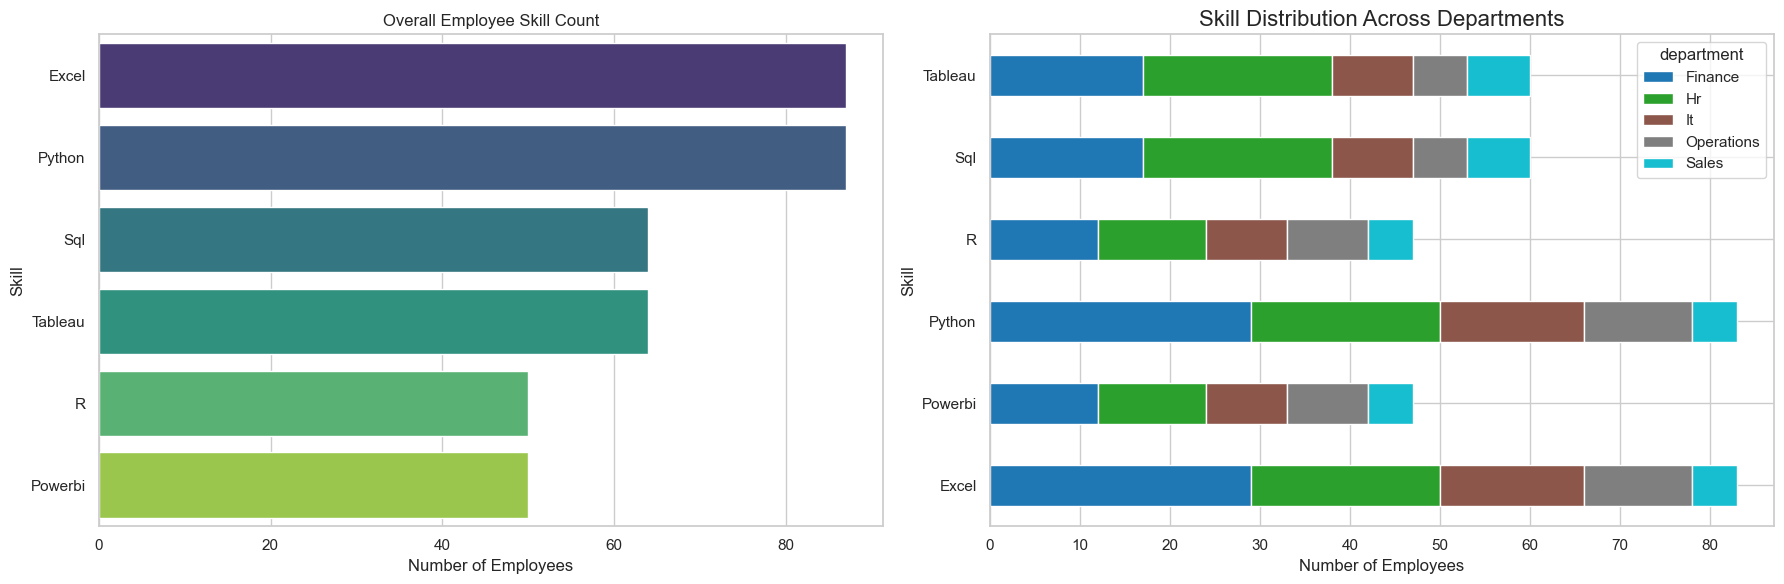

In [67]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(18,6))

sns.barplot(x=skill_counts.values, y=skill_counts.index, ax=axes[0], palette="viridis")
axes[0].set_title('Overall Employee Skill Count')
axes[0].set_xlabel('Number of Employees')
axes[0].set_ylabel('Skill')

skill_dept_counts = df_exploded.groupby(['skills','department']).size().unstack(fill_value=0)

skill_dept_counts.plot(kind='barh', stacked=True, colormap='tab10', ax=axes[1])
axes[1].set_title('Skill Distribution Across Departments', fontsize=16)
axes[1].set_xlabel('Number of Employees', fontsize=12)
axes[1].set_ylabel('Skill', fontsize=12)



plt.tight_layout()
plt.show()